## W207 EDA Attempts

### Import Libraries

In [191]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="ticks")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras import metrics
import keras_tuner as kt
from keras_tuner import HyperParameters
from keras.datasets import fashion_mnist

tf.get_logger().setLevel('INFO')

### Import Data

In [192]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = pd.DataFrame(breast_cancer_wisconsin_original.data.features)
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

### Perform EDA

In [193]:
X

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


<Axes: ylabel='Count'>

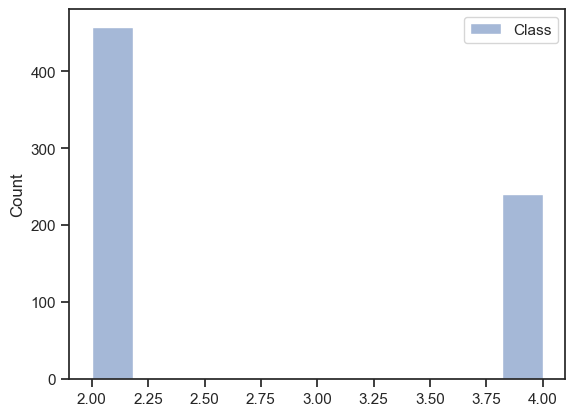

In [194]:
sns.histplot(y)

<Axes: xlabel='Clump_thickness', ylabel='Count'>

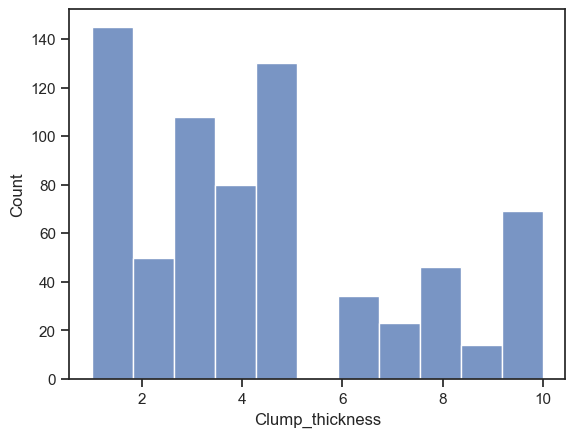

In [195]:
sns.histplot(X.Clump_thickness)

(array([579.,  35.,  33.,  12.,   6.,   3.,   9.,   8.,   0.,  14.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

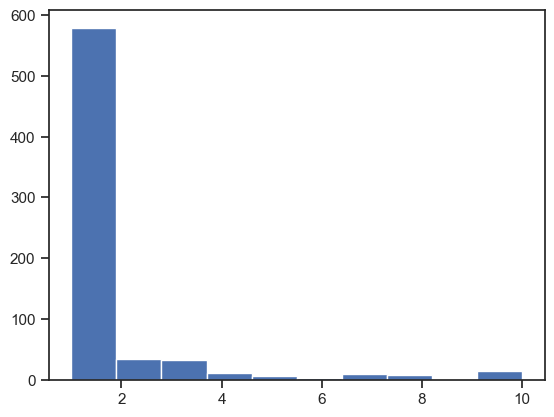

In [196]:
plt.hist(X.Mitoses)

Remove empty values

In [197]:
na_val = X[X.isnull().any(axis = 1)].index

X = X.drop(na_val)
y = y.drop(na_val)
print(len(X))
print(len(y))
#X.dropna()

683
683


In [198]:
# change Y from 2,4 to 0,1 

y = np.where(y == 2, 0, 1)

Perform Train/Test split

In [199]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state=1234)

(array([270.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 139.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

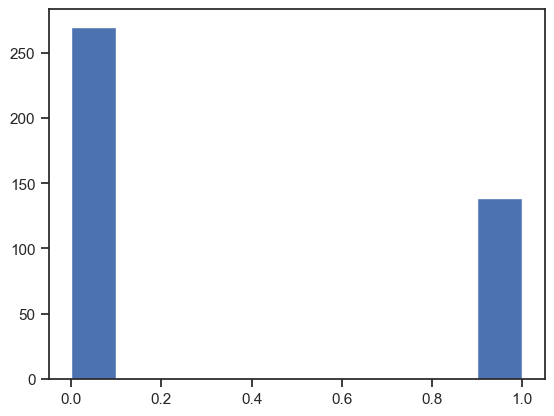

In [200]:
plt.hist(Y_train)

In [201]:
# remove rows from majority class
#Y_train.to_numpy()


print(f"Size of 0 Class: {len(np.where(Y_train == 0)[0])}")
print(f"Size of 1 Class: {len(np.where(Y_train != 0)[0])}")
#y = dataset.iloc[:, y.shape[0]].values

Size of 0 Class: 270
Size of 1 Class: 139


In [202]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(409, 9)
(137, 9)
(137, 9)


### Normalize Data

In [203]:
X_train.describe()
## all columns will need to be normalized 

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,409.000000,409.00000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,4.420538,2.93643,3.092910,2.814181,3.158924,3.437653,3.347188,2.672372,1.572127
std,2.824815,2.91394,2.921552,2.833569,2.197743,3.592837,2.395205,2.953105,1.767158
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.00000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.00000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.00000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [204]:
X_train  = X_train.apply(lambda x: x/max(x))

In [213]:
X_train_2 = np.array(X_train.to_numpy()[np.where(Y_train == 0)[0][:len(np.where(Y_train != 0)[0])],:])
X_train_4 = np.array(X_train.to_numpy()[np.where(Y_train != 0)[0],:])

print(X_train_2.shape[0])
print(X_train_4.shape[0])
X_train_merged = np.concatenate((X_train_2, X_train_4), axis = 0)
Y_train_merged = np.concatenate((np.zeros(len(np.where(Y_train != 0)[0])) * 0, np.ones(len(np.where(Y_train != 0)[0]))), axis = 0)

print(X_train_merged.shape)
print(Y_train_merged.shape)

139
139
(278, 9)
(278,)


### Shuffling data

In [214]:
np.random.seed(0)

np.random.shuffle(X_train_merged)
np.random.shuffle(Y_train_merged)


<Axes: ylabel='Count'>

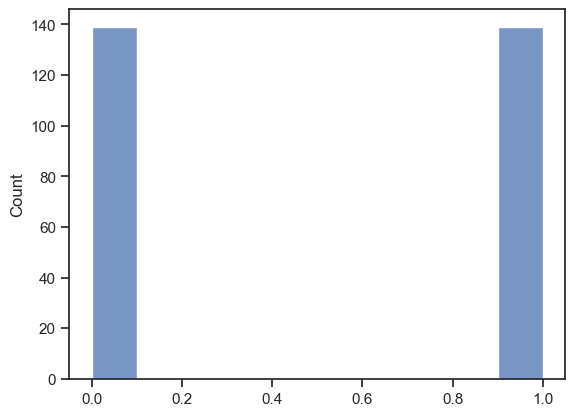

In [215]:
sns.histplot(Y_train_merged)

In [221]:
def build_model(num_features, learning_rate):
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units = 1, 
        input_shape=[num_features],   # input dim
        use_bias=True,               # use a bias (intercept) param
        activation="sigmoid",
    )
    )
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics = [metrics.BinaryAccuracy()])
    
    return model

In [226]:
model_log = build_model(X_train_merged.shape[1], 0.001)

/Users/protech/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [223]:
model_log.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [227]:
model_log.fit(
    x = X_train_merged,
    y = Y_train_merged,
    epochs = 5,
    batch_size = 32,
    validation_data = (X_val, Y_val)
)

Epoch 1/5
1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - binary_accuracy: 0.3750 - loss: 0.7145

2025-03-23 10:57:11.154032: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - binary_accuracy: 0.5119 - loss: 0.6988 - val_binary_accuracy: 0.8467 - val_loss: 0.4988
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 0.5119 - loss: 0.6988 - val_binary_accuracy: 0.8467 - val_loss: 0.4988
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.5084 - loss: 0.6988 - val_binary_accuracy: 0.8467 - val_loss: 0.4988
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.5084 - loss: 0.6988 - val_binary_accuracy: 0.8467 - val_loss: 0.4988
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.5084 - loss: 0.6988 - val_binary_accuracy: 0.8467 - val_loss: 0.4988


### Hyperparameter tuning